#### Import of Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pca import pca
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pycaret as pc

sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (7,5)

#### Dataset

In [6]:
df = pd.read_csv('datatest2.csv')
df=df.head(4000)
df=df.drop(columns=["id","date"])

In [7]:
df.head(5)

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,21.7600,31.133333,437.333333,1029.666667,0.005021,1
1,21.7900,31.000000,437.333333,1000.000000,0.005009,1
2,21.7675,31.122500,434.000000,1003.750000,0.005022,1
3,21.7675,31.122500,439.000000,1009.500000,0.005022,1
4,21.7900,31.133333,437.333333,1005.666667,0.005030,1


In [8]:
df.info()
print("Number of duplicated rows is: ", df.duplicated().sum())
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    2000 non-null   float64
 1   Humidity       2000 non-null   float64
 2   Light          2000 non-null   float64
 3   CO2            2000 non-null   float64
 4   HumidityRatio  2000 non-null   float64
 5   Occupancy      2000 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 93.9 KB
Number of duplicated rows is:  22
Number of rows with NaNs is:  0


#### Exploratory Data Analysis

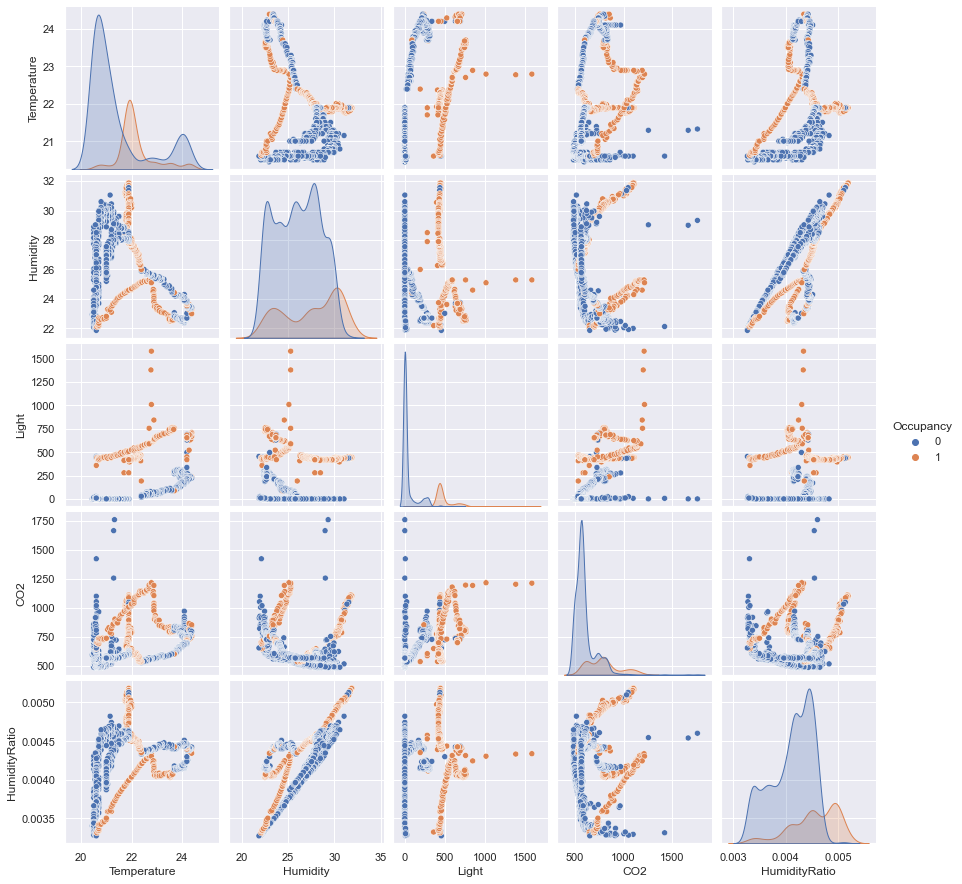

In [9]:
sns.pairplot(df, hue='Occupancy')
plt.show()

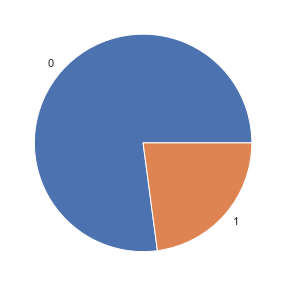

In [10]:
y =df['Occupancy']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

#### Data Matrix

In [11]:
X = df.drop(columns=['Occupancy'])
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temperature,2000.0,21.601342,1.148044,20.445000,20.600000,21.200000,21.97250,24.390000
Humidity,2000.0,26.369156,2.616832,21.865000,24.100000,26.445000,28.20000,31.890000
Light,2000.0,140.042000,211.375767,0.000000,0.000000,0.000000,289.00000,1581.000000
CO2,2000.0,640.547533,148.480651,484.666667,554.000000,580.166667,724.75000,1760.000000
HumidityRatio,2000.0,0.004208,0.000440,0.003275,0.003942,0.004246,0.00451,0.005185


#### Standardize the Data

In [12]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temperature,2000.0,-1.023182e-15,1.00025,-1.007480,-0.872434,-0.349675,0.323376,2.429658
Humidity,2000.0,2.273737e-16,1.00025,-1.721656,-0.867356,0.028990,0.699816,2.110271
Light,2000.0,-9.947598e-17,1.00025,-0.662692,-0.662692,-0.662692,0.704883,6.818749
CO2,2000.0,4.547474e-16,1.00025,-1.050102,-0.583033,-0.406760,0.567236,7.541268
HumidityRatio,2000.0,1.477929e-15,1.00025,-2.120057,-0.603030,0.086549,0.686549,2.221387


#### Observations and Variables

In [13]:
observations = list(df.index)
variables = list(df.columns)

#### Box and Whisker Plots

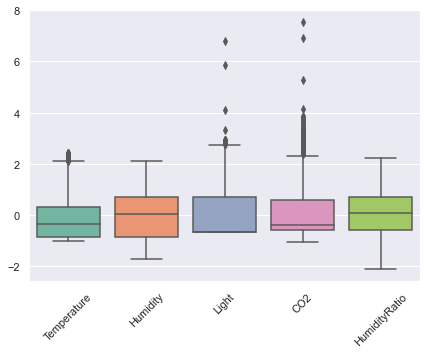

In [14]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

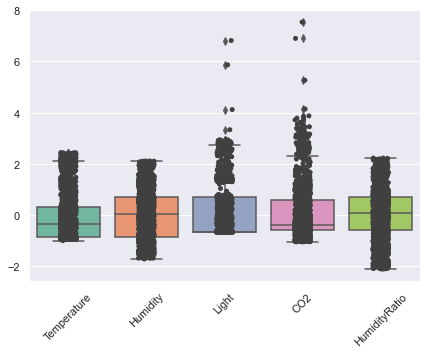

In [15]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

#### Correlation Matrix

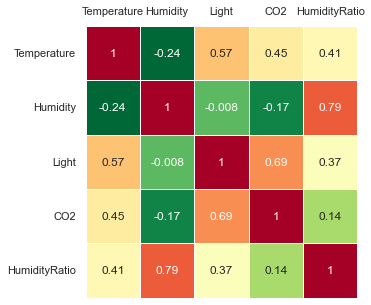

In [16]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#### PCA

In [17]:
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [5] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [4] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


PCs

In [18]:
out['PC']

,PC1,PC2,PC3,PC4
0,3.051970,-1.511437,1.816952,0.836682
1,2.951905,-1.507386,1.678045,0.715519
2,2.960826,-1.557458,1.707417,0.745227
3,2.993383,-1.544167,1.735666,0.750277
4,2.994565,-1.563128,1.701814,0.747098
...,...,...,...,...
1995,-1.142768,0.148525,-0.040003,0.018861
1996,-1.159578,0.247189,-0.025935,0.025768
1997,-1.143116,0.225843,-0.016298,0.038140
1998,-1.137030,0.203074,-0.017363,0.038932


Scatter Plot

(<Figure size 1440x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'4 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (47.1% expl.var)', ylabel='PC2 (34.7% expl.var)'>)

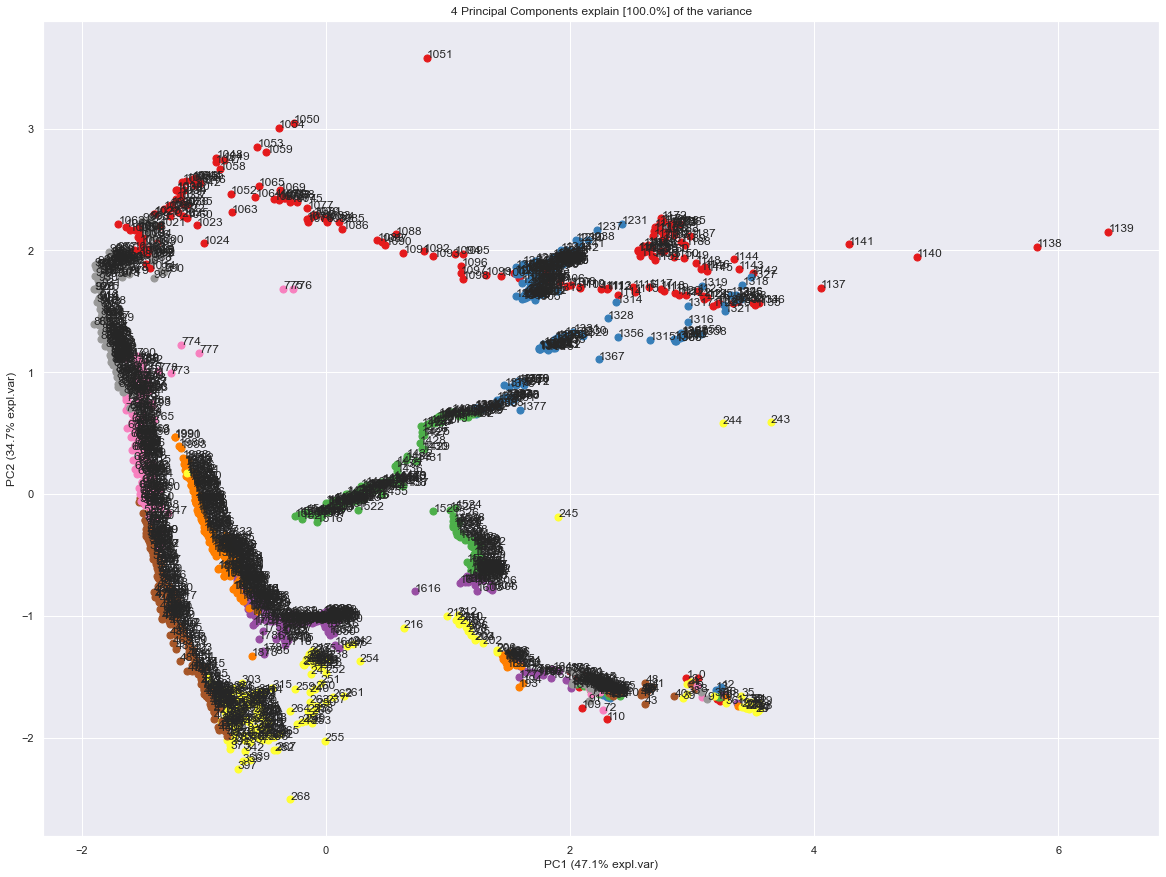

In [19]:
model.scatter(label=True, legend=False)

Eigenvectors

In [20]:
A = out['loadings'].T

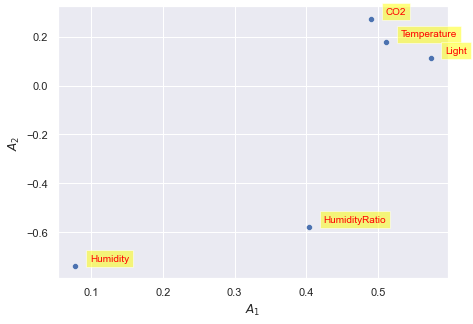

In [21]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

#### Scree Plot

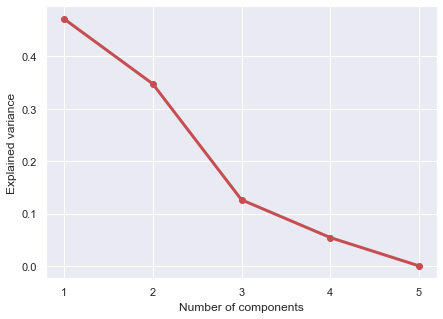

In [22]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

#### Explained Variance

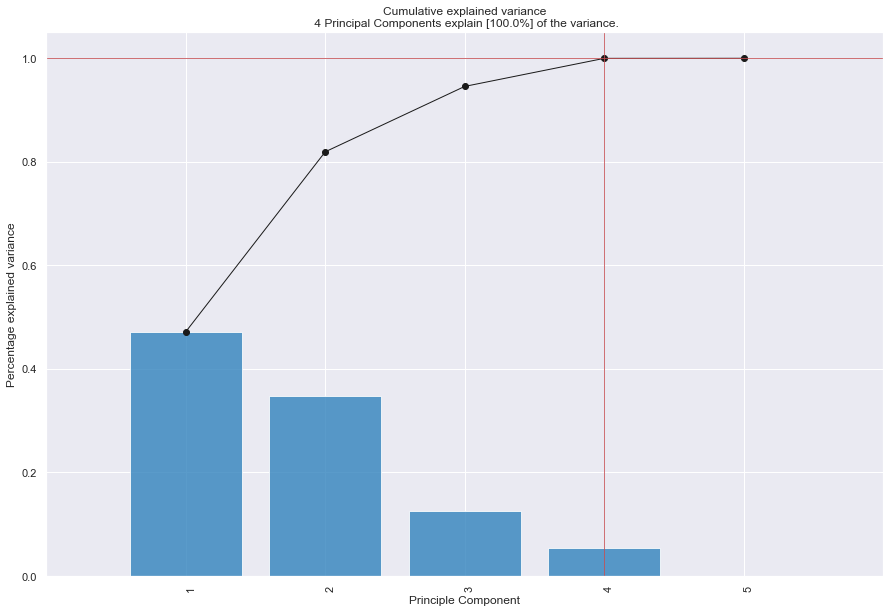

<Figure size 504x360 with 0 Axes>

In [23]:
model.plot();

BiPlot

[pca] >Plot PC1 vs PC2 with loadings.


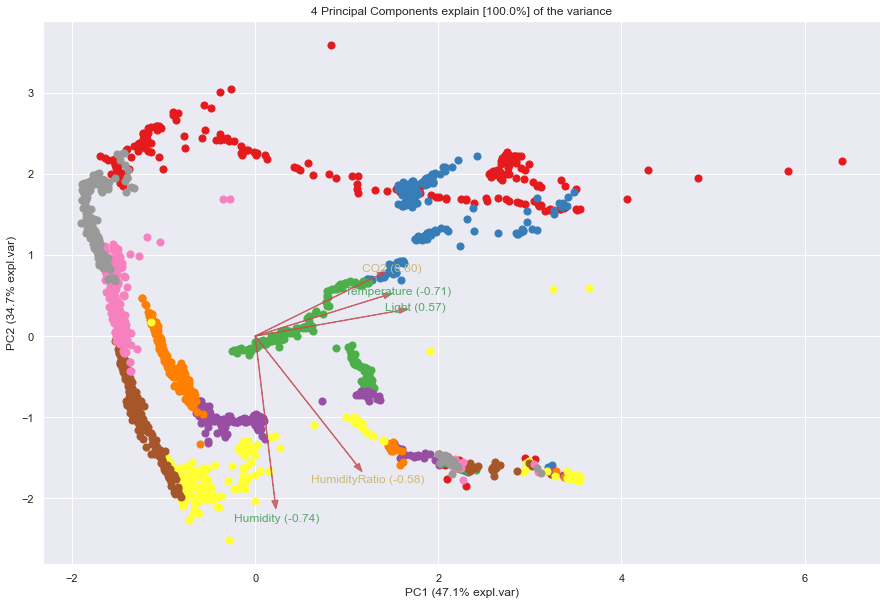

(<Figure size 1080x720 with 1 Axes>,
 <AxesSubplot:title={'center':'4 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (47.1% expl.var)', ylabel='PC2 (34.7% expl.var)'>)

In [24]:
model.biplot(label=False, legend=False)

In [25]:
#model.biplot3d(legend=False)

Classification

In [26]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (1800, 6)
Unseen Data For Predictions: (200, 6)


In [27]:
from pycaret.classification import *
clf = setup(data=data, target='Occupancy', train_size=0.7, session_id=123)

,Description,Value
0,session_id,123
1,Target,Occupancy
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(1800, 6)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


Comapring Models

In [29]:
#show the best model and their statistics
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9921,0.9908,0.9861,0.9799,0.9826,0.9775,0.9778,0.9940
ridge,Ridge Classifier,0.9921,0.0000,0.9861,0.9799,0.9826,0.9775,0.9778,0.0160
lda,Linear Discriminant Analysis,0.9921,0.9932,0.9861,0.9799,0.9826,0.9775,0.9778,0.0150
lr,Logistic Regression,0.9913,0.9950,0.9825,0.9797,0.9808,0.9752,0.9754,1.7010
qda,Quadratic Discriminant Analysis,0.9913,0.9925,0.9895,0.9732,0.9810,0.9753,0.9756,0.0200
et,Extra Trees Classifier,0.9913,0.9967,0.9757,0.9866,0.9806,0.9749,0.9754,0.2130
rf,Random Forest Classifier,0.9905,0.9960,0.9756,0.9833,0.9789,0.9727,0.9732,0.2170
lightgbm,Light Gradient Boosting Machine,0.9905,0.9947,0.9722,0.9866,0.9787,0.9725,0.9731,0.0530
gbc,Gradient Boosting Classifier,0.9889,0.9930,0.9722,0.9796,0.9754,0.9682,0.9686,0.1090
dt,Decision Tree Classifier,0.9849,0.9780,0.9653,0.9697,0.9668,0.9571,0.9576,0.0160


In [30]:
best_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

Create Decision Tree Classifier